In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\narra\AppData\Local\Temp\ipykernel_11148\181192011.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
df.shape

(102599, 26)

In [4]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.tail(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,06-07-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,11-10-2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [9]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,24-06-2019,1.34,4.0,3.0,47.0,NaN,NaN


In [10]:
#drop duplicate records
df.drop_duplicates(inplace=True) 

In [11]:
df.duplicated().value_counts()

False    102058
Name: count, dtype: int64

In [12]:
#drop insufficient data from house rules and license
df.drop(['house_rules','license'],axis=1,inplace=True)

In [13]:
#remove dollar signs
df['price']=df['price'].str.replace('$','',regex=False)
df['service fee']=df['service fee'].str.replace('$','',regex=False)

In [14]:
#remove all commas
df['price']=df['price'].str.replace(',','',regex=False)
df['service fee']=df['service fee'].str.replace(',','',regex=False)

In [15]:
#rename the price and services fee cloumns to include dollar sign
df.rename(columns={
    'price':'price_$',
    'service fee': 'service_fee_$'}, inplace=True)

In [16]:
#drop all records with missing values
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price_$                           0
service_fee_$                     0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [18]:
#change all mismatched data type types to the appropriate one
df['price_$']=df['price_$'].astype(float)

In [19]:
df['service_fee_$']=df['service_fee_$'].astype(float)

In [20]:
df['id']=df['id'].astype(str)

In [21]:
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

C:\Users\narra\AppData\Local\Temp\ipykernel_11148\230131709.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review']=pd.to_datetime(df['last review'])


In [22]:
#correct the spelling of brookln to brooklyn
df.loc[df['neighbourhood group']=='brookln','neighbourhood group']='Brooklyn'

In [23]:
#get rid outlier 
df=df.drop(df[df['availability 365']>500].index)

In [24]:
#different propertiesin dataset
property_types=df['room type'].value_counts().to_frame()

In [25]:
property_types

,count
room type,
Entire home/apt,44163
Private room,37494
Shared room,1646
Hotel room,108


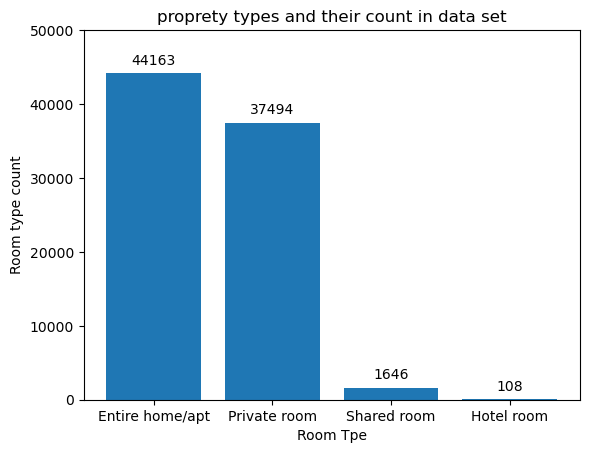

In [26]:
#room type count plot on barchat
room_type_bar=plt.bar(property_types.index,property_types.loc[:,'count'])
plt.bar_label(room_type_bar,labels=property_types.loc[:,'count'],padding=4)
plt.ylim([0,50000])
plt.xlabel('Room Tpe')
plt.ylabel('Room type count')
plt.title('proprety types and their count in data set')
plt.show()

In [27]:
#neighbourhood group count 
neighbour_grp=df['neighbourhood group'].value_counts().to_frame()

In [28]:
neighbour_grp

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34566
Queens,11126
Bronx,2267
Staten Island,816


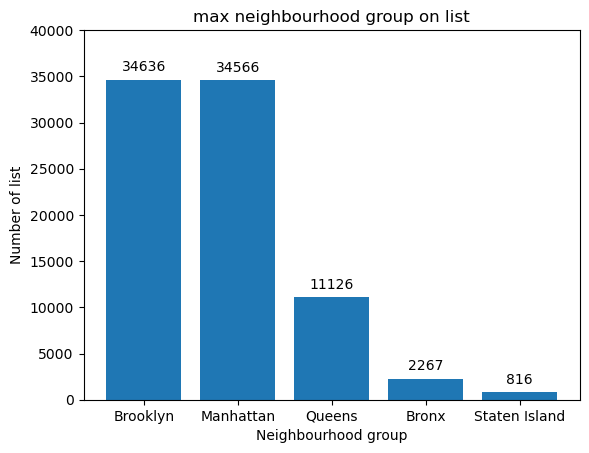

In [29]:
#max group in neighbourhood
neighbour_grp1=plt.bar(neighbour_grp.index,neighbour_grp.loc[:,'count'])
plt.bar_label(neighbour_grp1,labels=neighbour_grp.loc[:,'count'],padding=4)
plt.ylim([0,40000])
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of list')
#plt.xticks(rotation=90)
plt.title('max neighbourhood group on list')
plt.show()

In [31]:
#heighest avg price of neighbourhood
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

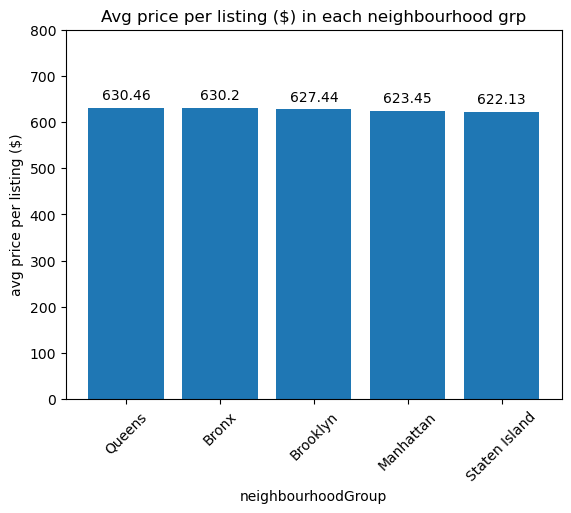

In [34]:
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price_$'])
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,'price_$'],2),label_type='edge',padding=4)
plt.ylim([0,800])
plt.xlabel('Neighbourhood Group')
plt.ylabel('avg price per listing ($)')
plt.xticks(rotation=45)
plt.title('Avg price per listing ($) in each neighbourhood grp')
plt.show()
         

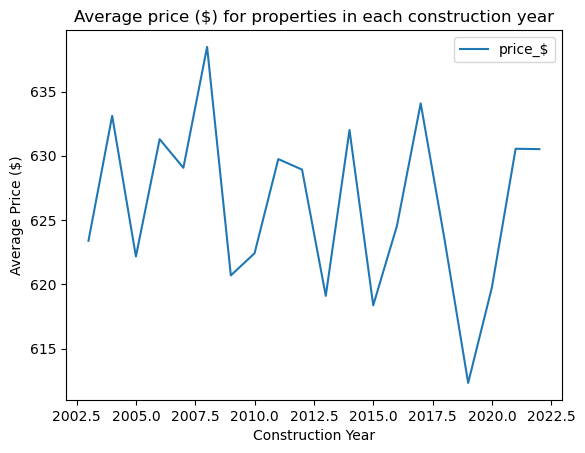

In [35]:
#checking relationship btwn construction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average price ($) for properties in each construction year')
plt.show()

In [37]:
#top 10 hosts
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()


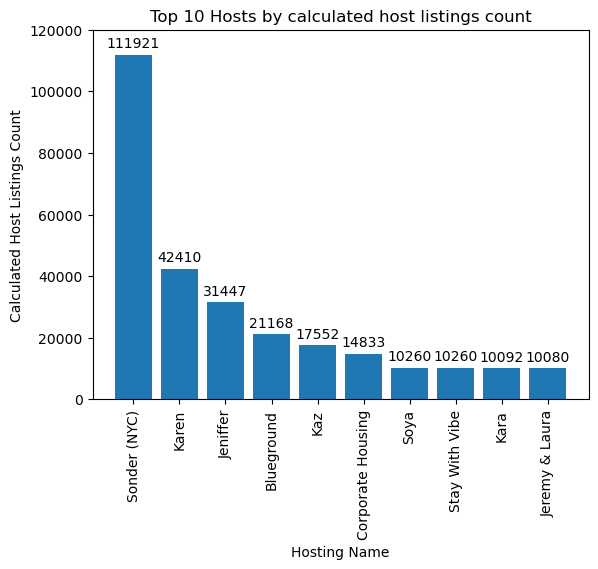

In [43]:
hosts_bar=plt.bar(hosts.index,hosts.loc[:,'calculated host listings count'])
plt.bar_label(hosts_bar,label=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3)
plt.xlabel('Hosting Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=90)
plt.title('Top 10 Hosts by calculated host listings count')
plt.ylim([0,120000])
plt.show()

In [44]:
#Review by host postive
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

In [45]:
review

,review rate number
host_identity_verified,
verified,3.284186
unconfirmed,3.273370


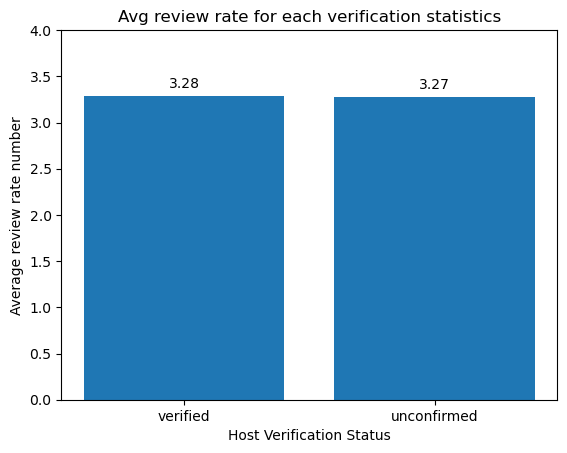

In [49]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4)
plt.ylim([0,4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average review rate number')
plt.title('Avg review rate for each verification statistics')
plt.show()

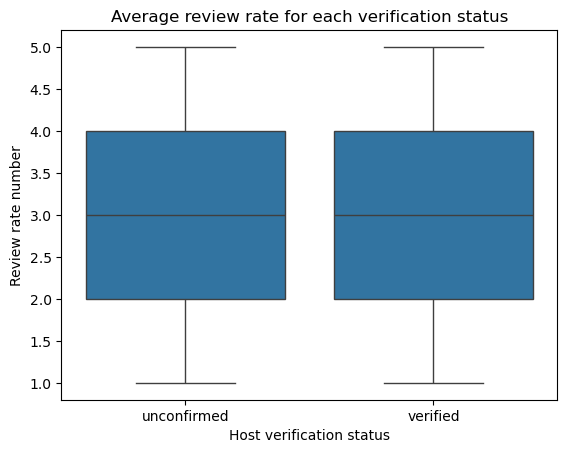

In [53]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color)
plt.xlabel('Host verification status')
plt.ylabel('Review rate number')
plt.title('Average review rate for each verification status')
plt.show()

In [54]:
#correlation between price of listing and services fee
df['price_$'].corr(df['service_fee_$'])

0.999990907477827

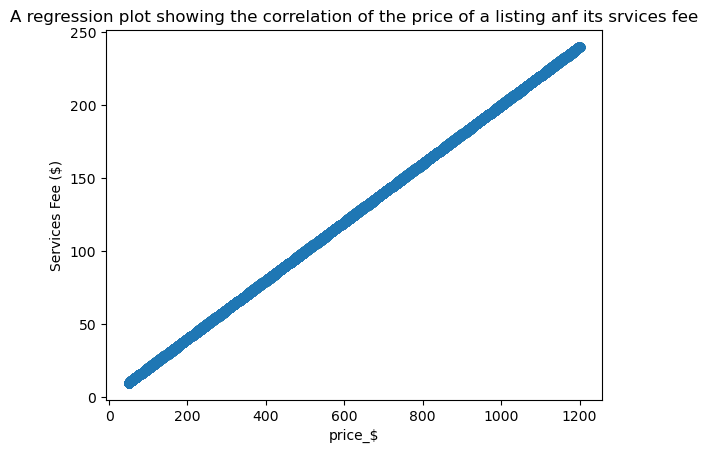

In [55]:
sns.regplot(df,x='price_$',y='service_fee_$')
plt.xlabel('price_$')
plt.ylabel('Services Fee ($)')
plt.title('A regression plot showing the correlation of the price of a listing anf its srvices fee')
plt.show()

In [59]:
#average review rate number for listing and neighbourhood group and room type
arrn=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()

In [60]:
arrn

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

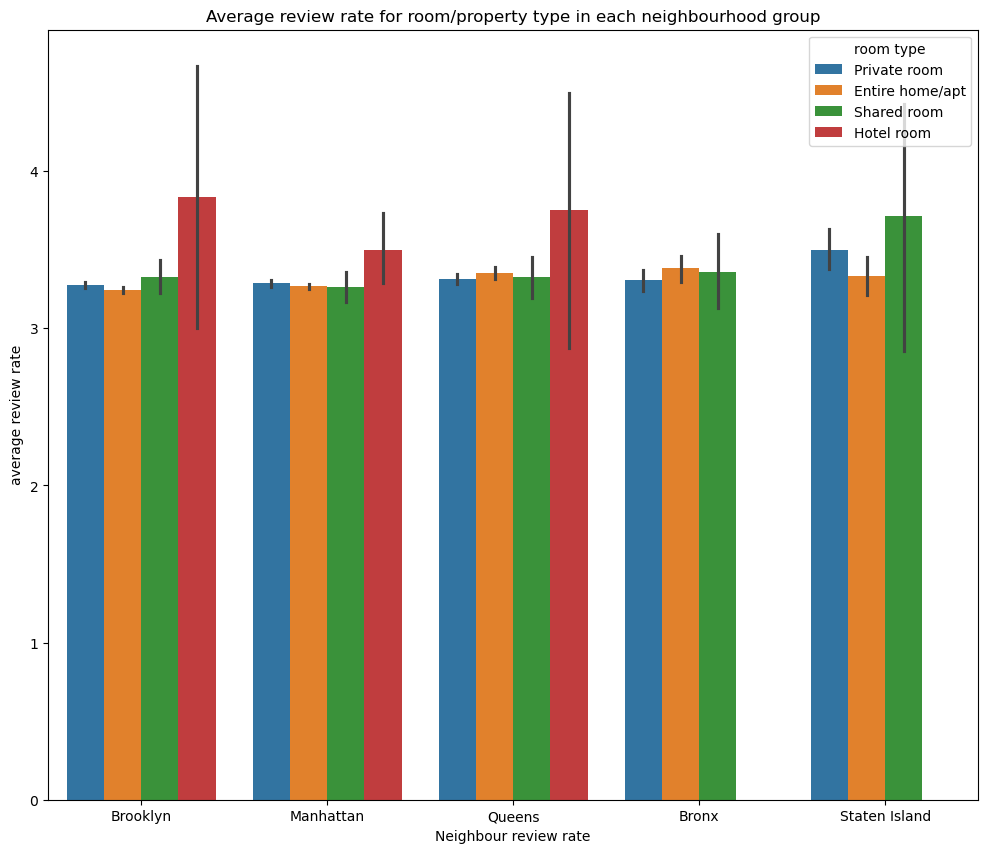

In [61]:
plt.figure(figsize=[12,10])
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbour review rate')
plt.ylabel('average review rate')
plt.title('Average review rate for room/property type in each neighbourhood group')
plt.show()

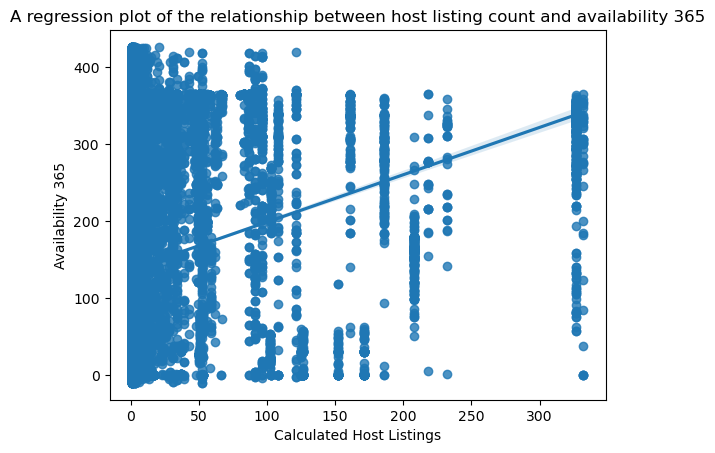

In [64]:
#Hosts with hogher calculated listing to maintain high availability through year
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A regression plot of the relationship between host listing count and availability 365')
plt.show()

In [65]:
df['calculated host listings count'].corr(df['availability 365'])

0.13598552736759312